# <font color='#FFE15D'>**Chapter 2: Linear Regression 📈**</font>

## **🔸 Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **🔸 Data**

### Load data

In [ ]:
df = pd.read_csv('data/student_loan_train.csv')
df

,year,debt
0,4,347.1
1,5,392.8
2,6,478.8
3,7,541.3
4,8,633.3
5,9,714.4
6,10,803.5
7,11,866.3
8,12,959.9
9,13,1071.0


### Conver to numpy array

In [ ]:
train_set = np.array(df)
train_set.shape

(10, 2)

### Split x & y

In [ ]:
x_train = train_set[:, 0]
x_train

array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [ ]:
y_train = train_set[:, 1]
y_train

array([ 347.1,  392.8,  478.8,  541.3,  633.3,  714.4,  803.5,  866.3,
        959.9, 1071. ])

### Visualize

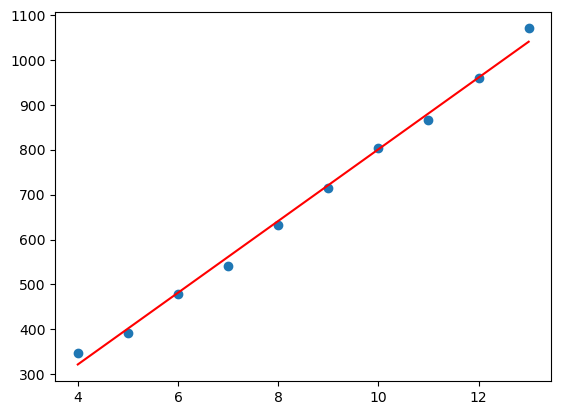

In [ ]:
plt.scatter(x_train, y_train)
# plt.plot(x_train, y_train, 'o-')

x =  np.linspace(4, 13, 100)
a, b = 80, 1.5
y = a*x + b
plt.plot(x, y, 'r')

## **🔸 Model**

### Define model

In [ ]:
def linear_regression(x, w0, w1):
    y_hat = w1*x + w0
    return y_hat

### Pass data to the model

#### - Initialize weight and bias

In [ ]:
w0 = np.random.randn()
w1 = np.random.randn()
w0, w1

(0.8282070026527061, 0.91187320315241)

#### - Get model's output

In [ ]:
y_hat = linear_regression(x_train, w0, w1)
y_hat

array([ 4.47569982,  5.38757302,  6.29944622,  7.21131942,  8.12319263,
        9.03506583,  9.94693903, 10.85881224, 11.77068544, 12.68255864])

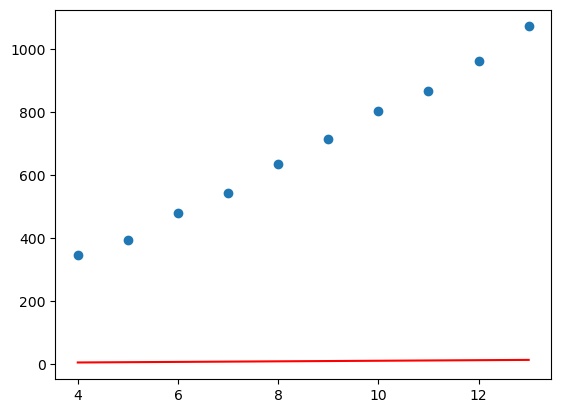

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_hat, 'r')

## **🔸 Loss (Cost) functions**

### Mean Squared Error (MSE)

$
\begin{align}
MSE &= \frac{1}{n} \sum_{i=1}^n (\hat{y}_i-y_i)^2
\end{align}
$

In [ ]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [ ]:
mse(y_train, y_hat)

504486.4112622846

### Mean Absolute Error (MAE)

$
\begin{align}
MAE &= \frac{1}{n} \sum_{i=1}^n |\hat{y}_i-y_i|
\end{align}
$

In [ ]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [ ]:
mae(y_train, y_hat)

672.2608707705517

### Compute loss for your model

In [ ]:
w0 = ...
w1 = ...
y_hat = linear_regression(...)

In [ ]:
mae_loss = ...
mse_loss = ...

### Plot loss surface

In [ ]:
w0 = 0
w1 = np.linspace(-100, 250, 1000)

mse_loss = []
for w1i in w1:
    y_hati = linear_regression(x_train, w0, w1i)
    mse_loss.append(mse(y_train, y_hati))
mse_loss = np.array(mse_loss)

mse_loss.shape, w1.shape

((1000,), (1000,))

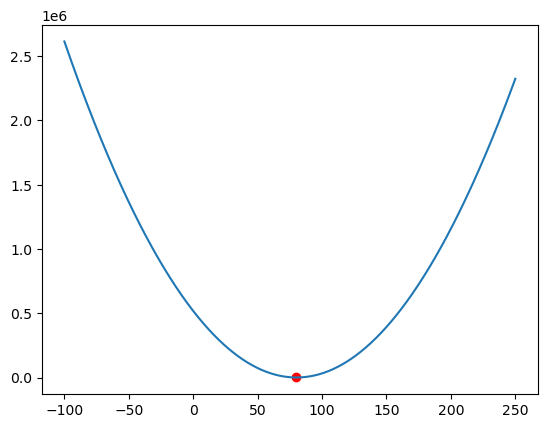

In [ ]:
plt.plot(w1, mse_loss)

loss_min_idx = np.argmin(mse_loss)
loss_min = mse_loss[loss_min_idx]
plt.scatter(w1[loss_min_idx], loss_min, color='r')

### Plot loss curve based on MAE

## **🔸 Gradient Descent**

<img src="imgs/gradient-descent.png" alt="string indexing" width=200 align="center" />

### Utils

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

def animate(x, func, gradfunc, xi, eta, N):
  if gradfunc is None:
    gradfunc = func
  xi_hist = []
  xi_hist.append(xi) # clone
  for iter in range(N):
    xi = gradient_descent(gradfunc, xi, eta, 1)
    xi_hist.append(xi) #clone
  xi_hist = np.array(xi_hist)
  fxi_hist = func(xi_hist)
  # plot animation
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(1, 1, 1)
  def plot_animate(i):
    ax.clear()
    ax.plot(x, func(x), linewidth=3)
    ax.plot(xi_hist[0:i], fxi_hist[0:i], color='black', linewidth=4)
    ax.plot(xi_hist[0], fxi_hist[0], 'r*', markersize=15)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
  ani = animation.FuncAnimation(fig, plot_animate,
                                frames=len(xi_hist),
                                interval=120,
                                repeat=False)
  plt.close()
  return HTML(ani.to_html5_video())

### Find the minimum of $ f(x)=x^{2} $

#### - Impelement $f$

In [ ]:
def funcx2(x):
    y = x**2
    return y

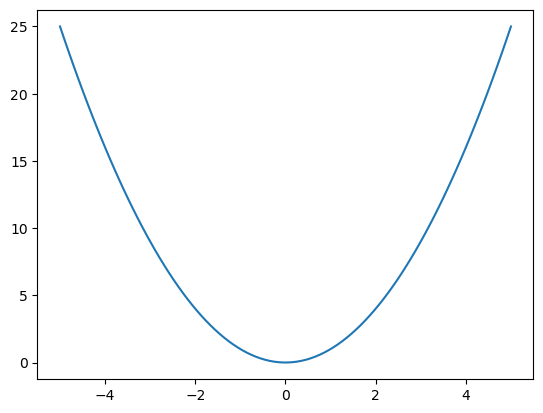

In [ ]:
x = np.linspace(-5, 5, 100)
plt.plot(x, funcx2(x))

#### - Impelement gradient function

In [ ]:
def gradfuncx2(x):
    return 2*x

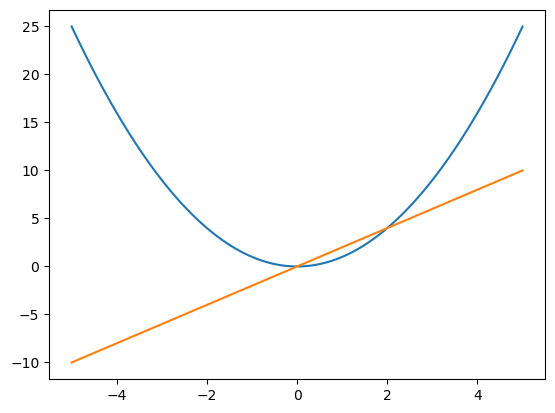

In [ ]:
plt.plot(x, funcx2(x))
plt.plot(x, gradfuncx2(x))

#### - Impelement Gradient Descent algorithm

In [ ]:
def gradient_descent(gradfunc, xi, eta, N):
    for i in range(N):
        grad = gradfunc(xi)
        xi -= eta*grad
    return xi

In [ ]:
gradient_descent(gradfuncx2, xi=3.5, eta=0.2, N=50)

2.8289844711266692e-11

#### - Animation

In [ ]:
x = np.linspace(-5, 5, 100)
animate(x, funcx2, gradfuncx2, xi=-4.5, eta=1.1, N=50)

### Find the minimum of $f$

$ f(x) = 0.125x^4-0.1875x^3-0.75x^2+0.5x $

$ f^{'}(x) = 0.5x^3-0.5625x^2-1.5x+0.5$

$ x \in [-2.5, 3.3] $

#### - Impelement $f$

In [ ]:
def funcx4(x):
  return 0.125*x**4 - 0.1875*x**3 - 0.75*x**2 + 0.5*x

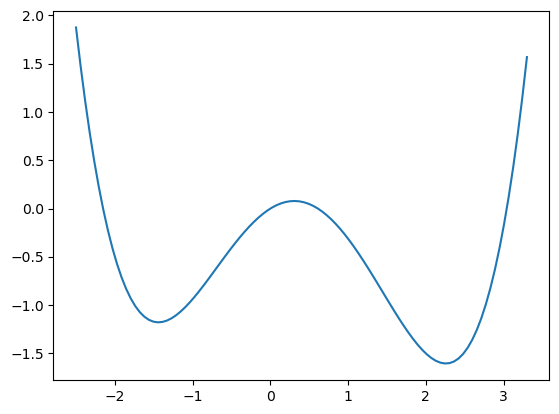

In [ ]:
x = np.linspace(-2.5, 3.3, 100)
plt.plot(x, funcx4(x))

#### - Impelement gradient function

In [ ]:
def gradfx4(x):
  return 0.5*x**3 - 0.5625*x**2 - 1.5*x + 0.5

#### - Animation

In [ ]:
animate(x, funcx4, gradfx4, xi=1, eta=0.3, N=10)

### Find the minimum of $ f(x,y) = x^2+y^2 $

#### - Impelement $f$

In [ ]:
def func3d(x, y):
    return x**2 + y**2

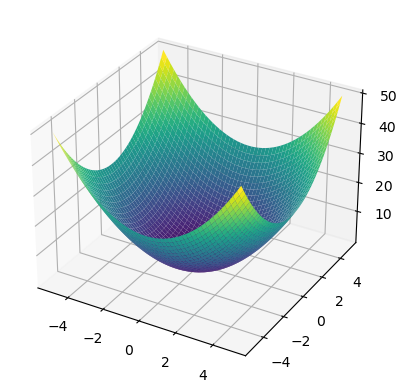

In [ ]:
x, y = np.meshgrid(np.linspace(-5, 5), np.linspace(-5, 5))
z = func3d(x, y)

ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap='viridis');

#### - Impelement gradient function

In [ ]:
def gradf3d(x, y):
    return 2*x, 2*y

In [ ]:
gradf3d(3, 2)

(6, 4)

#### - Impelement Gradient Descent algorithm

In [ ]:
def gradient_descent(gradfunc, xi, yi, eta, N):
    for i in range(N):
        grad = gradfunc(xi, yi)
        xi -= eta*grad[0]
        yi -= eta*grad[1]
    return xi, yi

In [ ]:
gradient_descent(gradf3d, xi=-5., yi=5, eta=0.2, N=50)

(-4.041406387323812e-11, 4.041406387323812e-11)

## **🔸 Training Model**

<img src="imgs/train.png" alt="string indexing" width=400 align="center" />

In [ ]:
def linear_regression(x, w0, w1):
    y_hat = w1*x + w0
    return y_hat

In [ ]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [ ]:
# Load train set
df = pd.read_csv('student_loan_train.csv')
train_set = np.array(df)
x_train = train_set[:, 0]
y_train = train_set[:, 1]

# Init
w0, w1 = np.random.randn(), np.random.randn()
eta = 0.01
n_epochs = 10000

for epoch in range(n_epochs):
    # predictions
    y_hat = linear_regression(x_train, w0, w1)

    # loss
    e = mse(y_train, y_hat)

    # gradients
    grad_w0 = 2 * np.mean(y_hat - y_train)
    grad_w1 = 2 * np.mean(x_train * (y_hat - y_train))

    # gradient descent
    w0 -= eta * grad_w0
    w1 -= eta * grad_w1

    if epoch % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w0={w0:.4},\t w1={w1:.4}')

Epoch=0, 	 E=5.077e+05,	 w0=13.23,	 w1=128.6
Epoch=100, 	 E=243.9,	 w0=5.848,	 w1=79.53
Epoch=200, 	 E=240.7,	 w0=4.077,	 w1=79.71
Epoch=300, 	 E=238.5,	 w0=2.631,	 w1=79.87
Epoch=400, 	 E=237.1,	 w0=1.451,	 w1=79.99
Epoch=500, 	 E=236.2,	 w0=0.487,	 w1=80.09
Epoch=600, 	 E=235.6,	 w0=-0.2997,	 w1=80.18
Epoch=700, 	 E=235.1,	 w0=-0.9418,	 w1=80.24
Epoch=800, 	 E=234.9,	 w0=-1.466,	 w1=80.3
Epoch=900, 	 E=234.7,	 w0=-1.894,	 w1=80.34
Epoch=1000, 	 E=234.5,	 w0=-2.243,	 w1=80.38
Epoch=1100, 	 E=234.5,	 w0=-2.529,	 w1=80.41
Epoch=1200, 	 E=234.4,	 w0=-2.761,	 w1=80.44
Epoch=1300, 	 E=234.4,	 w0=-2.951,	 w1=80.46
Epoch=1400, 	 E=234.3,	 w0=-3.107,	 w1=80.47
Epoch=1500, 	 E=234.3,	 w0=-3.233,	 w1=80.49
Epoch=1600, 	 E=234.3,	 w0=-3.337,	 w1=80.5
Epoch=1700, 	 E=234.3,	 w0=-3.421,	 w1=80.51
Epoch=1800, 	 E=234.3,	 w0=-3.49,	 w1=80.51
Epoch=1900, 	 E=234.3,	 w0=-3.546,	 w1=80.52
Epoch=2000, 	 E=234.3,	 w0=-3.592,	 w1=80.52
Epoch=2100, 	 E=234.3,	 w0=-3.63,	 w1=80.53
Epoch=2200, 	 E=234.3,	 w0

Text(0.5, 1.0, 'y=80.55x-3.796')

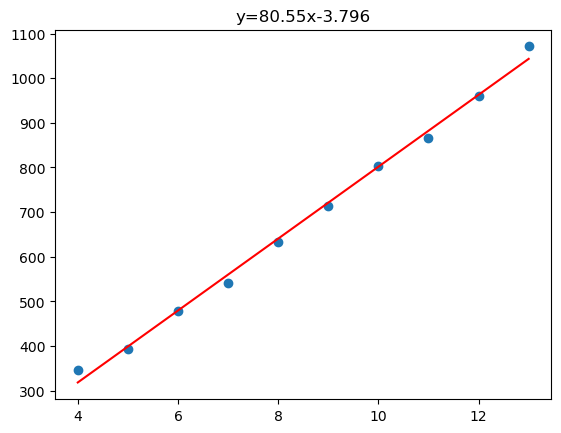

In [ ]:
plt.scatter(x_train, y_train)

y_hat = linear_regression(x_train, w0, w1)
plt.plot(x_train, y_hat, 'r')
plt.title(f'y={w1:.4}x{w0:.4}')

### Save Model

In [ ]:
np.savetxt('linear-regression', np.array([w0, w1]))

### Load Model

In [ ]:
w = np.loadtxt('linear-regression')
w0, w1 = w[0], w[1]
print(w0, w1)

-3.7963636181274603 80.54545454352656


## **🔸 Evaluating Model**

### R-squared

$
\begin{align}
R^2 &= 1 - \frac{\sum_{i} (y_{i} - \hat{y_{i}})^2} {\sum_{i} (y_{i} - \bar{y})^2}
\end{align}
$

In [ ]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

In [ ]:
y_hat = linear_regression(x_train, w0, w1)
r2(y_train, y_hat)

0.9956415176868934

### Evaluate the model

In [ ]:
# Load test set
df = pd.read_csv('student_loan_test.csv')
test_set = np.array(df)
x_test = test_set[:, 0]
y_test = test_set[:, 1]

df

,year,debt
0,14,1155.83
1,15,1271.84
2,16,1358.13


In [ ]:
y_hat_test = linear_regression(x_test, w0, w1)
y_hat_test, y_test

(array([1123.83999999, 1204.38545453, 1284.93090908]),
 array([1155.83, 1271.84, 1358.13]))

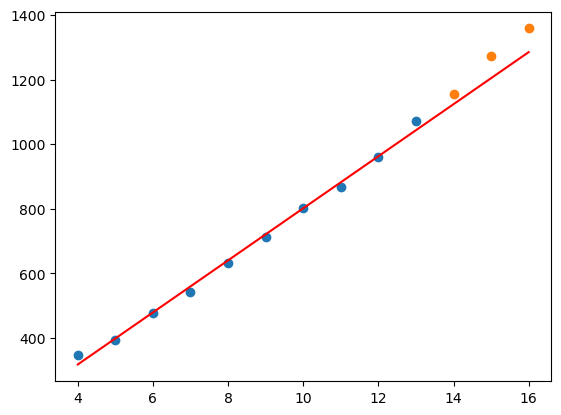

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

x = np.linspace(4, 16, 100)
y_hat = linear_regression(x, w0, w1)
plt.plot(x, y_hat, 'r');

In [ ]:
mse(y_test, y_hat_test)

3643.860905414849

In [ ]:
mae(y_test, y_hat_test)

57.5478787985625

In [ ]:
np.sqrt(mse(y_test, y_hat_test))

60.36440097785158

In [ ]:
r2(y_test, y_hat_test)

0.469594468778768